In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy.io import fits
from astropy.table import Table

In [2]:
# import data
sg_file = '/Users/wanyan/Desktop/Astro/229/229_data/stellar_data/sg.dat'
giant_file = '/Users/wanyan/Desktop/Astro/229/229_data/stellar_data/giants.dat'

sg_dat = Table.read(sg_file, format='ascii.csv', delimiter=';')
giant_dat = Table.read(giant_file, format='ascii.csv', delimiter=';')

In [3]:
#sg_table and giant_table
print('SG TABLE \n')
sg_dat.pprint()

print('\n GIANTS TABLE \n')
giant_dat.pprint()

SG TABLE 

Spectral Type Temperature (K) ... Luminosity (in solar luminosities)
------------- --------------- ... ----------------------------------
           B0          21,000 ...                            320,000
           B1          16,000 ...                            280,000
           B2          14,000 ...                            220,000
           B3          12,800 ...                            180,000
           B5          11,500 ...                            140,000
           B6          11,000 ...                             98,000
           B7          10,500 ...                             82,000
           B8          10,000 ...                             73,000
           B9            9700 ...                             61,000
           A0            9400 ...                             50,600
           A1            9100 ...                             44,000
           A2            8900 ...                             40,000
           A5          

In [4]:
# SG conversions
# Temperature
sg_temps = []
chk_char = ','

for tt in sg_dat['Temperature (K)']:
    if chk_char in tt:
        sg_temps.append(tt.replace(chk_char, ''))
    else:
        sg_temps.append(tt)

sg_t = np.array(sg_temps).astype(float)

# Luminosity
sg_lums = []

for ll in sg_dat['Luminosity (in solar luminosities)']:
    if chk_char in ll:
        sg_lums.append(ll.replace(chk_char, ''))
    else:
        sg_lums.append(ll)

sg_l = np.array(sg_lums).astype(float)

Text(0, 0.5, 'log(Luminosity [Solar Luminosities])')

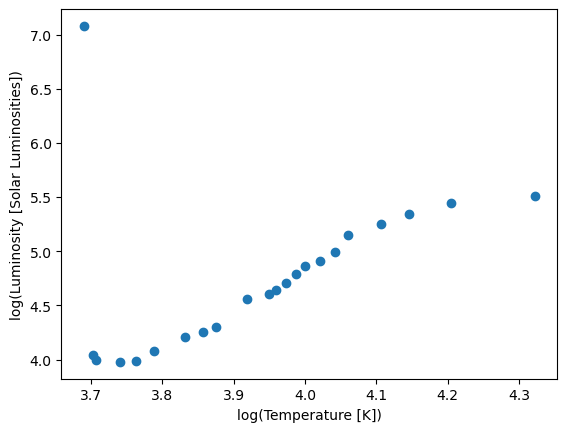

In [5]:
# First Draft Diagram

plt.scatter(np.log10(sg_t), np.log10(sg_l))
plt.xlabel('log(Temperature [K])')
plt.ylabel('log(Luminosity [Solar Luminosities])')

Text(0.5, 1.0, 'SG Luminosity-Temperature Relation')

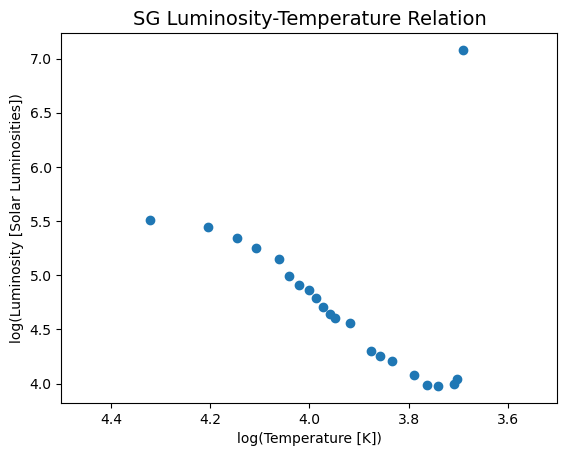

In [6]:
# Adjust based on tradition

plt.scatter(np.log10(sg_t), np.log10(sg_l))
plt.xlabel('log(Temperature [K])')
plt.ylabel('log(Luminosity [Solar Luminosities])')
plt.xlim([4.5, 3.5])
plt.title("SG Luminosity-Temperature Relation", fontsize=14)

In [7]:
# Check the type of data in Giants
print(type(giant_dat['Temperature (K)'][0]))
print("\n")
print(type(giant_dat['Temperature (K)'][1]))
print("\n")
print(type(giant_dat['Luminosity (in solar luminosities)'][0]))
print("\n")
print(type(giant_dat['Luminosity (in solar luminosities)'][1]))

<class 'numpy.ma.core.MaskedConstant'>


<class 'numpy.int64'>


<class 'numpy.ma.core.MaskedConstant'>


<class 'numpy.float64'>


In [8]:
#GIANTS Conversion
# Temperature
ga_temps = []

for tt in giant_dat['Temperature (K)']:
    if not np.ma.is_masked(tt):
        ga_temps.append(tt)

ga_t = np.array(ga_temps).astype(float)


# Luminosity
ga_lums = []

for ll in giant_dat['Luminosity (in solar luminosities)']:
    if not np.ma.is_masked(ll):
        ga_lums.append(ll)

ga_l = np.array(ga_lums).astype(float)

Text(0, 0.5, 'log(Luminosity [Solar Luminosities])')

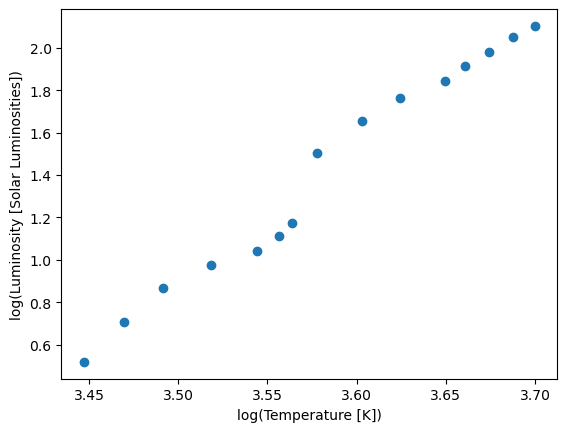

In [9]:
# First Draft

plt.scatter(np.log10(ga_t), np.log10(ga_l))
plt.xlabel('log(Temperature [K])')
plt.ylabel('log(Luminosity [Solar Luminosities])')

Text(0.5, 1.0, 'GIANTS Luminosity-Temperature Relation')

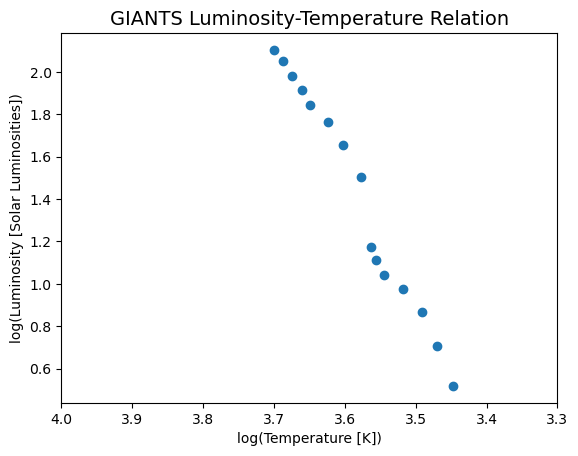

In [10]:
# Adjust based on tradition

plt.scatter(np.log10(ga_t), np.log10(ga_l))
plt.xlabel('log(Temperature [K])')
plt.ylabel('log(Luminosity [Solar Luminosities])')
plt.xlim([4.0, 3.3])
plt.title("GIANTS Luminosity-Temperature Relation", fontsize=14)

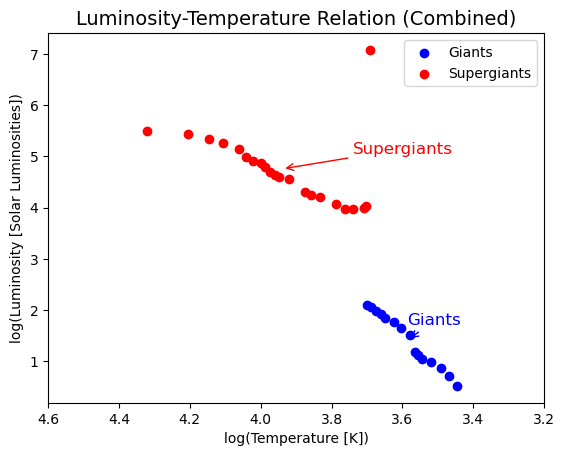

In [11]:
# Combine them
# GA
plt.scatter(np.log10(ga_t), np.log10(ga_l), color='blue', label='Giants')
plt.annotate("Giants", xy=(np.log10(ga_t).mean(), np.log10(ga_l).mean()),
             xytext=(np.log10(ga_t).mean()+0.001, np.log10(ga_l).mean()+0.3),
             arrowprops=dict(arrowstyle="->", color='blue'),
             fontsize=12, color='blue')

# SG
plt.scatter(np.log10(sg_t), np.log10(sg_l), color='red', label='Supergiants')
plt.annotate("Supergiants", xy=(np.log10(sg_t).mean(), np.log10(sg_l).mean()),
             xytext=(np.log10(sg_t).mean()-0.2, np.log10(sg_l).mean()+0.3),
             arrowprops=dict(arrowstyle="->", color='red'),
             fontsize=12, color='red')

# Axes and title
plt.xlabel('log(Temperature [K])')
plt.ylabel('log(Luminosity [Solar Luminosities])')
plt.xlim([4.6, 3.2])
plt.title("Luminosity-Temperature Relation (Combined)", fontsize=14)
plt.legend()

plt.show()

In [12]:
ms_file = '/Users/wanyan/Desktop/Astro/229/229_data/stellar_data/ms.dat'
dat = Table.read(ms_file, format='ascii.csv', delimiter=';', comment='#')

print(dat)

Spectral Type Temperature (K) ... Luminosity (in solar luminosities)
------------- --------------- ... ----------------------------------
           O5           54000 ...                           846000.0
           O6           45000 ...                           275000.0
           O7           43300 ...                           220000.0
           O8           40600 ...                           150000.0
           O9           37800 ...                            95000.0
           B0           29200 ...                            20000.0
           B1           23000 ...                             4600.0
           B2           21000 ...                             2600.0
           B3           17600 ...                              900.0
           B5           15200 ...                              360.0
          ...             ... ...                                ...
           M5            3200 ...                              0.026
           M6            3100 ... 

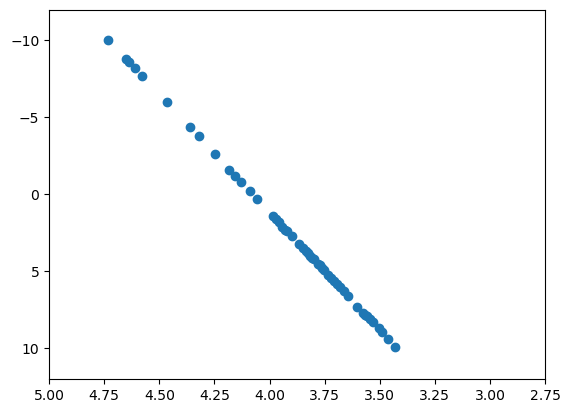

In [13]:
# remove the unknown data
temps = np.array(dat['Temperature (K)']).astype(float)
lums = np.array(dat['Luminosity (in solar luminosities)']).astype(float)

mags = dat['Absolute Magnitude']
mags_float = np.array([np.nan if m == '*' else float(m) for m in mags])
log_temps = np.log10(temps)

# Plot: matplotlib will automatically skip the NaNs
plt.scatter(log_temps, mags_float)
plt.xlim([5.0, 2.75])
plt.ylim([12.0, -12.0])
plt.show()

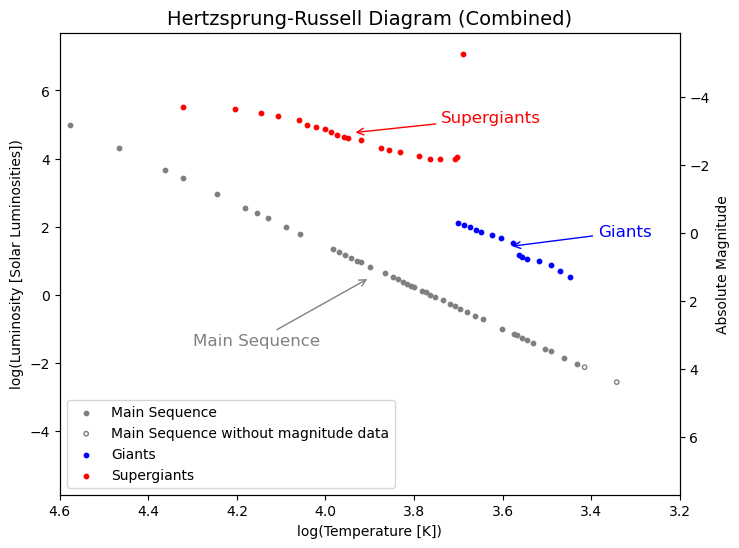

In [14]:
log_temps = np.log10(temps)
log_lums = np.log10(lums)


fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_xlabel("log(Temperature [K])")
ax1.set_ylabel("log(Luminosity [Solar Luminosities])", color="black")

# Select magnitude data
has_mag = ~np.isnan(mags_float)  
no_mag = np.isnan(mags_float)   

# MS
ax1.scatter(log_temps[has_mag], log_lums[has_mag], color="gray", label="Main Sequence", s=10)
ax1.scatter(log_temps[no_mag], log_lums[no_mag], facecolors="none", edgecolors="gray", label="Main Sequence without magnitude data", s=10)
ax1.annotate("Main Sequence",
             xy=(3.9, 0.5),            
             xytext=(4.3, -1.5),       
             arrowprops=dict(arrowstyle="->", color="gray"),
             fontsize=12, color="gray")

# GA
plt.scatter(np.log10(ga_t), np.log10(ga_l), color='blue', label='Giants', s=10)
plt.annotate("Giants", xy=(np.log10(ga_t).mean(), np.log10(ga_l).mean()),
             xytext=(np.log10(ga_t).mean()-0.2, np.log10(ga_l).mean()+0.3),
             arrowprops=dict(arrowstyle="->", color='blue'),
             fontsize=12, color='blue')

# SG
plt.scatter(np.log10(sg_t), np.log10(sg_l), color='red', label='Supergiants', s=10)
plt.annotate("Supergiants", xy=(np.log10(sg_t).mean(), np.log10(sg_l).mean()),
             xytext=(np.log10(sg_t).mean()-0.2, np.log10(sg_l).mean()+0.3),
             arrowprops=dict(arrowstyle="->", color='red'),
             fontsize=12, color='red')

ax1.set_xlim([4.6, 3.2])

# Magnitude axis
ax2 = ax1.twinx()
ax2.set_ylabel("Absolute Magnitude", color="black")
ax2.set_ylim(ax1.get_ylim()[::-1])

plt.title("Hertzsprung-Russell Diagram (Combined)", fontsize=14)
ax1.legend(fontsize=10, loc="best")

plt.show()